# Barb Demo

Demonstration of wind barb plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x = np.linspace(-5, 5, 5)
X, Y = np.meshgrid(x, x)
U, V = 12 * X, 12 * Y

data = [(-1.5, .5, -6, -6),
        (1, -1, -46, 46),
        (-3, -1, 11, -11),
        (1, 1.5, 80, 80),
        (0.5, 0.25, 25, 15),
        (-1.5, -0.5, -5, 40)]

data = np.array(data, dtype=[('x', np.float32), ('y', np.float32),
                             ('u', np.float32), ('v', np.float32)])

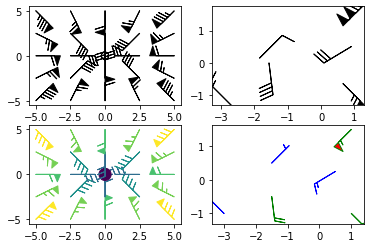

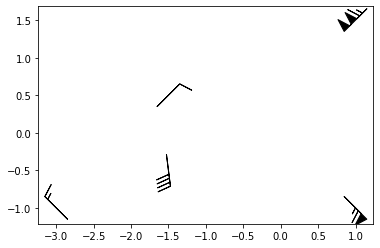

In [3]:
fig1, axs1 = plt.subplots(nrows=2, ncols=2)
# Default parameters, uniform grid
axs1[0, 0].barbs(X, Y, U, V)

# Arbitrary set of vectors, make them longer and change the pivot point
# (point around which they're rotated) to be the middle
axs1[0, 1].barbs(
    data['x'], data['y'], data['u'], data['v'], length=8, pivot='middle')

# Showing colormapping with uniform grid.  Fill the circle for an empty barb,
# don't round the values, and change some of the size parameters
axs1[1, 0].barbs(
    X, Y, U, V, np.sqrt(U ** 2 + V ** 2), fill_empty=True, rounding=False,
    sizes=dict(emptybarb=0.25, spacing=0.2, height=0.3))

# Change colors as well as the increments for parts of the barbs
axs1[1, 1].barbs(data['x'], data['y'], data['u'], data['v'], flagcolor='r',
                 barbcolor=['b', 'g'], flip_barb=True,
                 barb_increments=dict(half=10, full=20, flag=100))

# Masked arrays are also supported
masked_u = np.ma.masked_array(data['u'])
masked_u[4] = 1000  # Bad value that should not be plotted when masked
masked_u[4] = np.ma.masked

# Identical plot to panel 2 in the first figure, but with the point at
# (0.5, 0.25) missing (masked)
fig2, ax2 = plt.subplots()
ax2.barbs(data['x'], data['y'], masked_u, data['v'], length=8, pivot='middle')

plt.show()